### 피마 인디언 당뇨병 예측

### https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

- 당뇨병 여부를 판단.
- 피마 인디언 당뇨병 데이터 셋트는 북아메리카 피마 지역 원주민의  Type-2 당뇨병 결과 데이터. 

- 보통 당뇨 원인으로 식습관과 유전을 꼽습니다.

- 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만, 20세기 후반에 들어서면서 서구화된 식습관으로 당뇨 환자가 생김.

 - Pregnancies : 임신 횟수 -> Number of times pregnant 
 - Glucose : 포도당 부하 검사 수치 -> Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 - bloodPressure : 혈압(mm Hg) -> Diastolic blood pressure (mm Hg)
 - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm) ->Triceps skin fold thickness (mm)
 - Insulin : 2시간 혈청 인슐린(mu U/ml) ->2-Hour serum insulin (mu U/ml)
 - BMI : 체질량 지수( 체중(kg) / (키(m)^2)) -> Body mass index (weight in kg/(height in m)^2)
 - DiabetesPedigressFunction : 당뇨병 혈통 기능. ->Diabetes pedigree function
 - Age : 나이 ->age(years)
 - Outcome : class 결정 값 (0 또는 1) -> Class variable (0 or 1) 268 of 768 are 1, the others are 0

- 피마 인디언
  - https://inews.ewha.ac.kr/news/articleView.html?idxno=15150 이대학보

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('C:/Users/405/my_study/Python_Study/0518/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
df.shape

(768, 9)

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

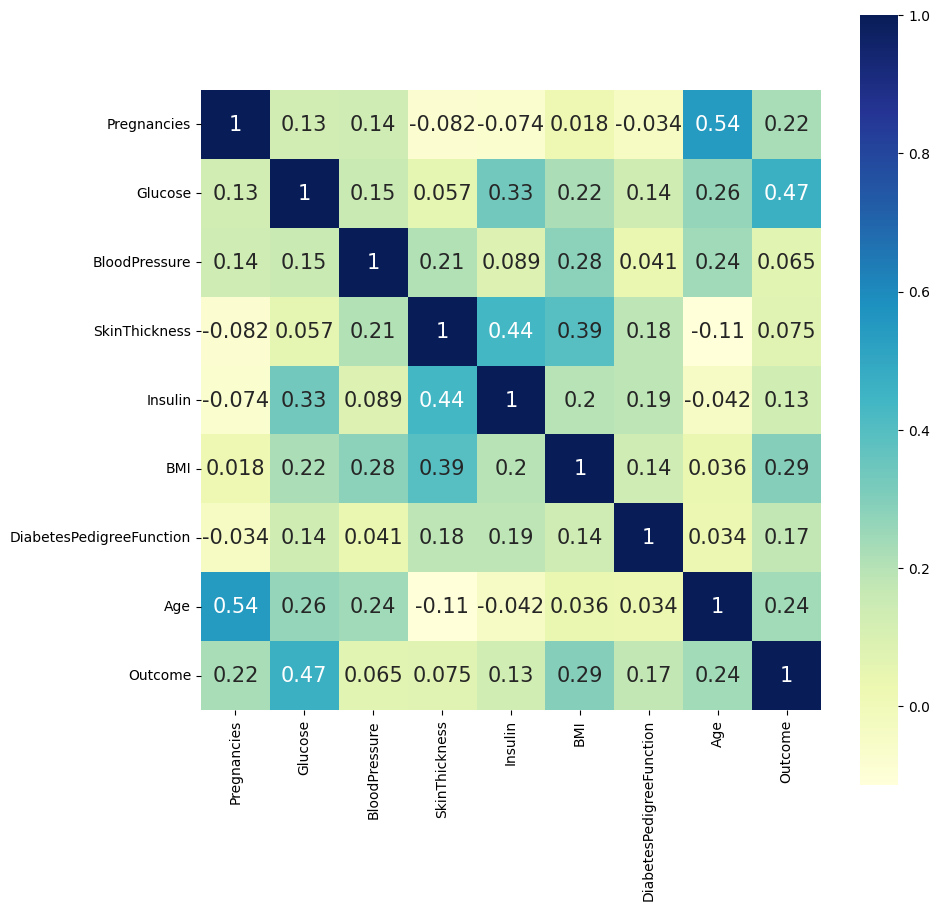

In [137]:
plt.figure(figsize=(10,10)) # 히트맵그리기
sns.heatmap(corr, cbar=True, square= True,annot=True, annot_kws={'size':15}, cmap='YlGnBu')
# 컬러바표시, 정사각형 히트맵, 히트맵의상관관계값

In [ ]:
sns.regplot(x='Pregnancies',y='Outcome',data=df,scatter_kws={"fc":"r", "ec":"r"})

<Axes: xlabel='Glucose', ylabel='Outcome'>

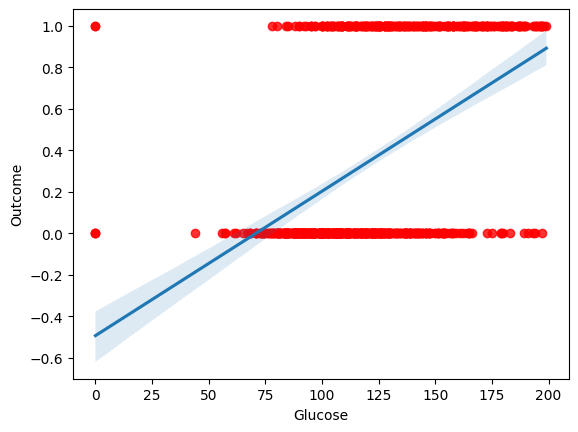

In [95]:
sns.regplot(x='Glucose',y='Outcome',data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.regplot(x='BloodPressure',y='Outcome',data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.regplot(x='SkinThickness',y='Outcome',data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.regplot(x='Insulin',y='Outcome', data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.regplot(x='BMI',y='Outcome', data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.regplot(x='DiabetesPedigreeFunction',y='Outcome', data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.regplot(x='Age',y='Outcome', data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.pairplot(
	df,
    hue ="Outcome" 
    )
plt.show()

In [50]:
df_data=df.drop('Outcome',axis=1)
df_target=df['Outcome']

In [ ]:
sns.barplot(data=df,x='Age',y='Outcome',color='darkturquoise')
plt.show()

sns.kdeplot(df.Glucose)
plt.show()

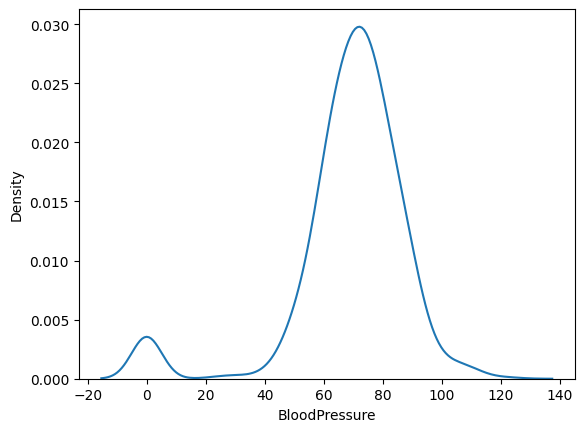

In [99]:
sns.kdeplot(df.BloodPressure)
plt.show()

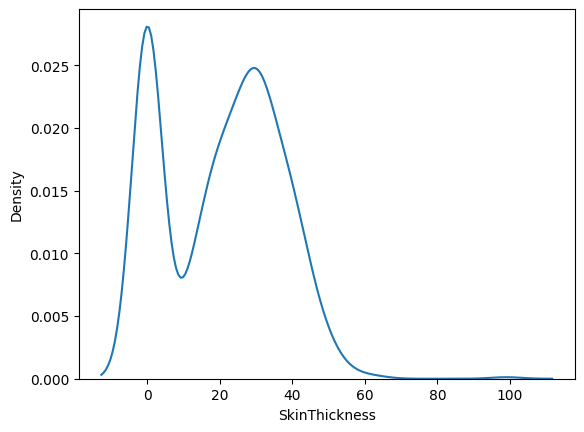

In [100]:
sns.kdeplot(df.SkinThickness)
plt.show()

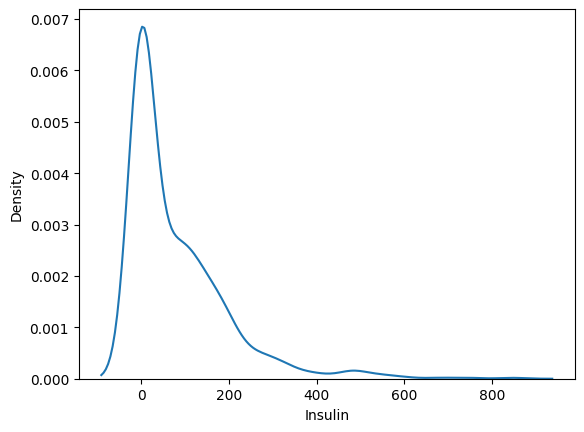

In [101]:
sns.kdeplot(df.Insulin) 
plt.show()

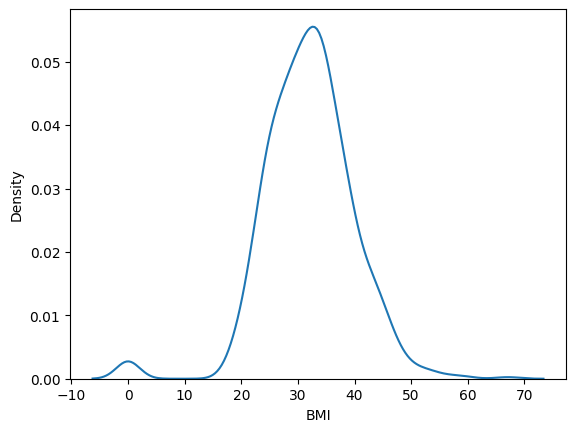

In [102]:
sns.kdeplot(df.BMI) # 메디안
plt.show()

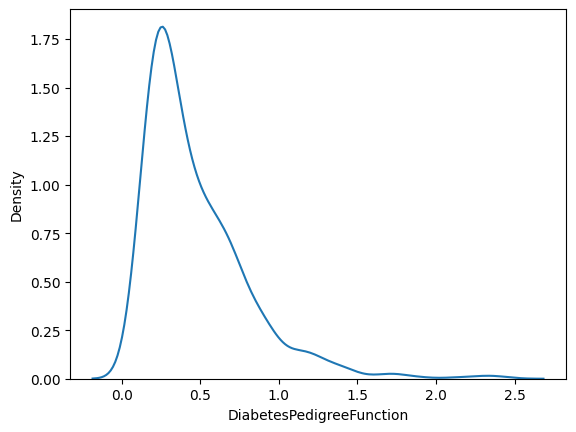

In [103]:
sns.kdeplot(df.DiabetesPedigreeFunction)
plt.show()

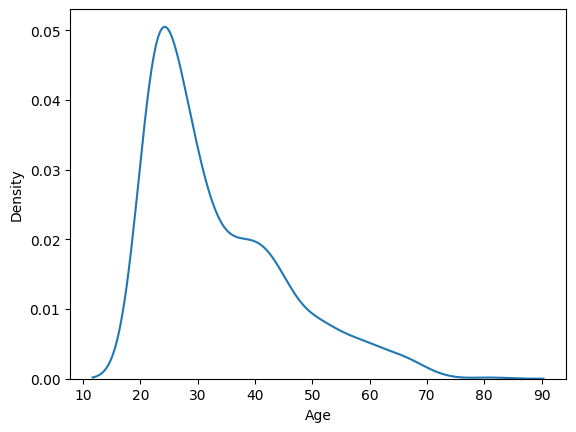

In [104]:
sns.kdeplot(df.Age)
plt.show()

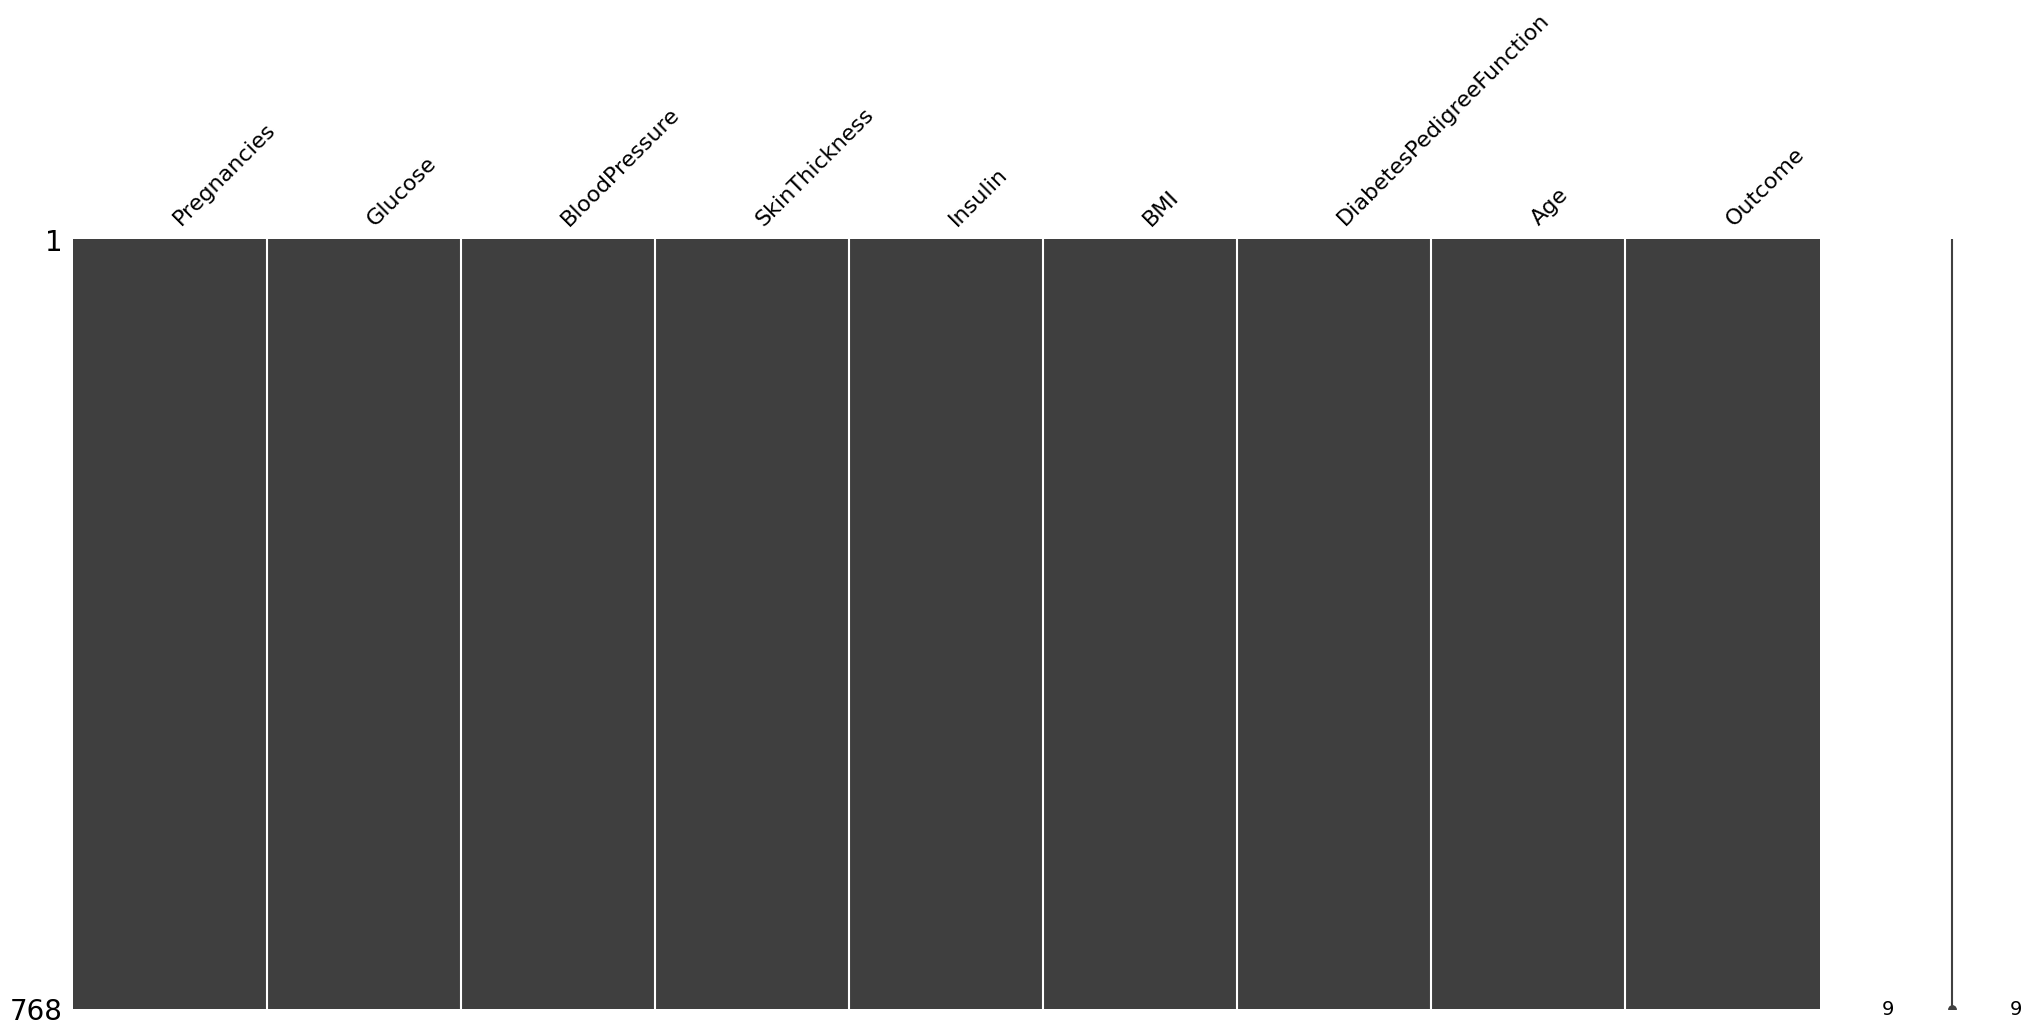

In [108]:
import missingno as msno
msno.matrix(df)
plt.show()

- 결측치가 없다고 나오나 0인 값이 많이 존재

In [159]:
df_data = df.copy()
df_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [160]:
df_data['SkinThickness'] = df_data['SkinThickness'].replace(0, np.NaN)
df_data['SkinThickness'].fillna(df_data['SkinThickness'].value_counts().idxmax(), inplace=True)
df_data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,32.0,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1
5,5,116,74,32.0,0,25.6,0.201,30,0
6,3,78,50,32.0,88,31.0,0.248,26,1
7,10,115,0,32.0,0,35.3,0.134,29,0
8,2,197,70,45.0,543,30.5,0.158,53,1
9,8,125,96,32.0,0,0.0,0.232,54,1


In [161]:
df_data['BloodPressure'] = df_data['BloodPressure'].replace(0, np.NaN)
df_data['BloodPressure'].fillna(df_data['BloodPressure'].value_counts().idxmax(), inplace=True)

In [162]:
df_data=df_data[df_data['BMI']!=0]
df_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0,33.6,0.627,50,1
1,1,85,66.0,29.0,0,26.6,0.351,31,0
2,8,183,64.0,32.0,0,23.3,0.672,32,1
3,1,89,66.0,23.0,94,28.1,0.167,21,0
4,0,137,40.0,35.0,168,43.1,2.288,33,1
5,5,116,74.0,32.0,0,25.6,0.201,30,0
6,3,78,50.0,32.0,88,31.0,0.248,26,1
7,10,115,70.0,32.0,0,35.3,0.134,29,0
8,2,197,70.0,45.0,543,30.5,0.158,53,1
10,4,110,92.0,32.0,0,37.6,0.191,30,0


In [163]:
df_data=df_data[df_data['Glucose']!=0]
df_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0,33.6,0.627,50,1
1,1,85,66.0,29.0,0,26.6,0.351,31,0
2,8,183,64.0,32.0,0,23.3,0.672,32,1
3,1,89,66.0,23.0,94,28.1,0.167,21,0
4,0,137,40.0,35.0,168,43.1,2.288,33,1
5,5,116,74.0,32.0,0,25.6,0.201,30,0
6,3,78,50.0,32.0,88,31.0,0.248,26,1
7,10,115,70.0,32.0,0,35.3,0.134,29,0
8,2,197,70.0,45.0,543,30.5,0.158,53,1
10,4,110,92.0,32.0,0,37.6,0.191,30,0


In [165]:
df_data['Insulin'] = df_data['Insulin'].replace(0, np.NaN)
df_data['Insulin'].fillna(df_data['Insulin'].median(skipna=True), inplace=True)

In [166]:
corr2=df_data.corr()
corr2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125717,0.205668,0.099640,0.023544,0.018352,-0.029159,0.545238,0.213371
Glucose,0.125717,1.000000,0.219674,0.199057,0.420492,0.232771,0.133945,0.261490,0.494190
BloodPressure,0.205668,0.219674,1.000000,0.205562,0.047116,0.280514,0.000915,0.320707,0.159826
SkinThickness,0.099640,0.199057,0.205562,1.000000,0.134840,0.521205,0.081481,0.156385,0.218522
Insulin,0.023544,0.420492,0.047116,0.134840,1.000000,0.179808,0.128775,0.096063,0.203889
BMI,0.018352,0.232771,0.280514,0.521205,0.179808,1.000000,0.153683,0.022144,0.309884
DiabetesPedigreeFunction,-0.029159,0.133945,0.000915,0.081481,0.128775,0.153683,1.000000,0.031674,0.178052
Age,0.545238,0.261490,0.320707,0.156385,0.096063,0.022144,0.031674,1.000000,0.232734
Outcome,0.213371,0.494190,0.159826,0.218522,0.203889,0.309884,0.178052,0.232734,1.000000


<Axes: >

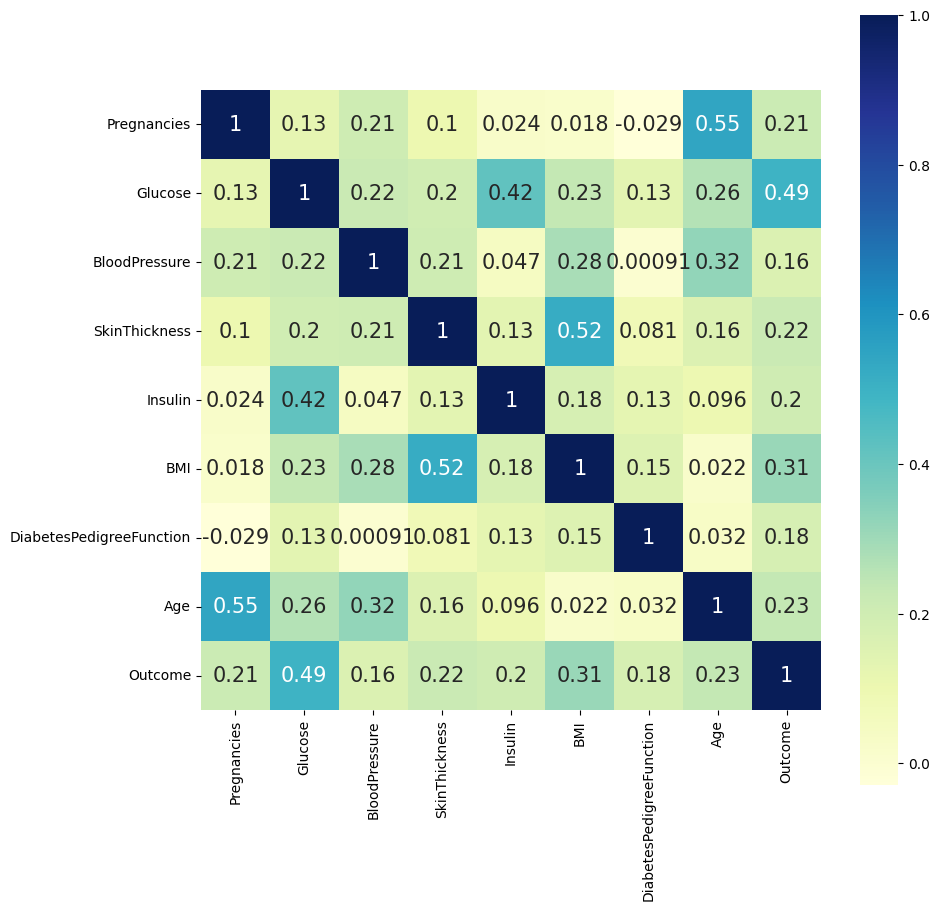

In [167]:
plt.figure(figsize=(10,10)) # 히트맵그리기
sns.heatmap(corr2, cbar=True, square= True,annot=True, annot_kws={'size':15}, cmap='YlGnBu')

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

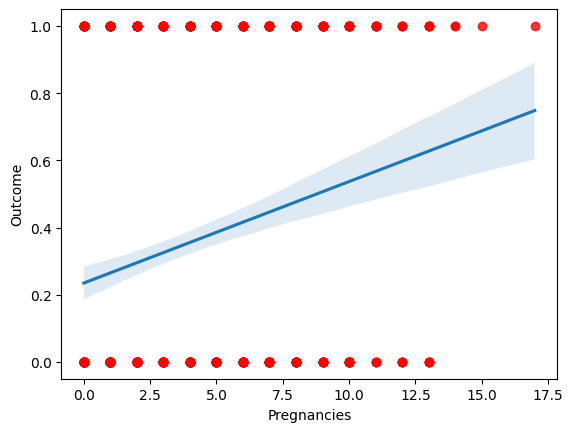

In [138]:
sns.regplot(x='Pregnancies',y='Outcome',data=df_data,scatter_kws={"fc":"r", "ec":"r"})

<Axes: xlabel='Glucose', ylabel='Outcome'>

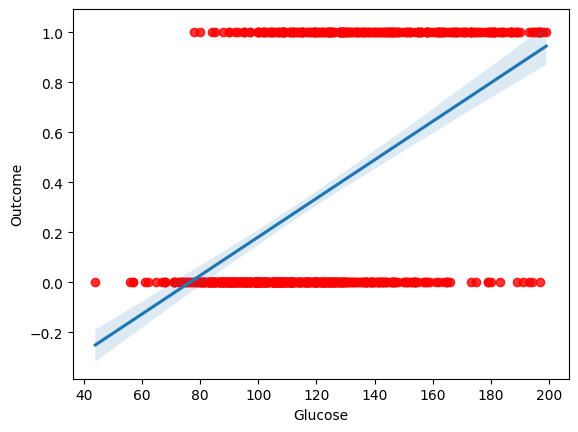

In [139]:
sns.regplot(x='Glucose',y='Outcome',data=df_data,scatter_kws={"fc":"r", "ec":"r"})

<Axes: xlabel='BloodPressure', ylabel='Outcome'>

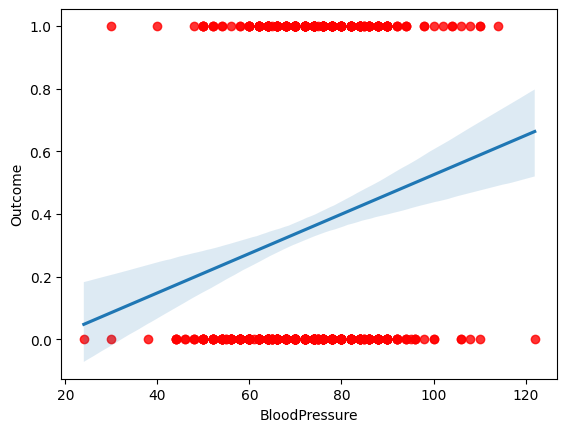

In [140]:
sns.regplot(x='BloodPressure',y='Outcome',data=df_data,scatter_kws={"fc":"r", "ec":"r"})

C:\Users\405\AppData\Local\Temp\ipykernel_8620\554784336.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_data["Glucose"][df_data.Outcome == 1],
C:\Users\405\AppData\Local\Temp\ipykernel_8620\554784336.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_data["Glucose"][df_data.Outcome == 0],


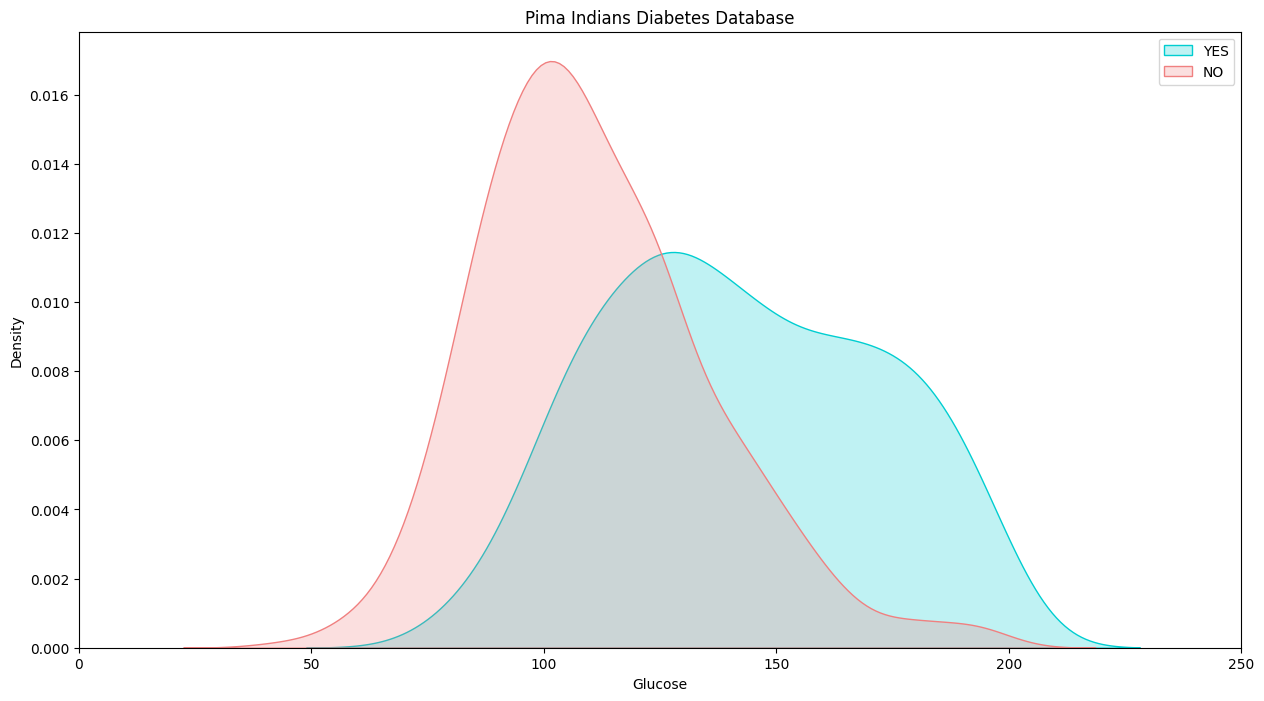

In [168]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_data["Glucose"][df_data.Outcome == 1], 
                 color="darkturquoise", shade=True)
sns.kdeplot(df_data["Glucose"][df_data.Outcome == 0], 
            color="lightcoral", shade=True)
plt.legend(['YES', 'NO'])
plt.title('Pima Indians Diabetes Database')
ax.set(xlabel='Glucose')
plt.xlim(0,250)
plt.show()

C:\Users\405\AppData\Local\Temp\ipykernel_8620\2463589363.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_data["Insulin"][df_data.Outcome == 1],
C:\Users\405\AppData\Local\Temp\ipykernel_8620\2463589363.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_data["Insulin"][df_data.Outcome == 0],


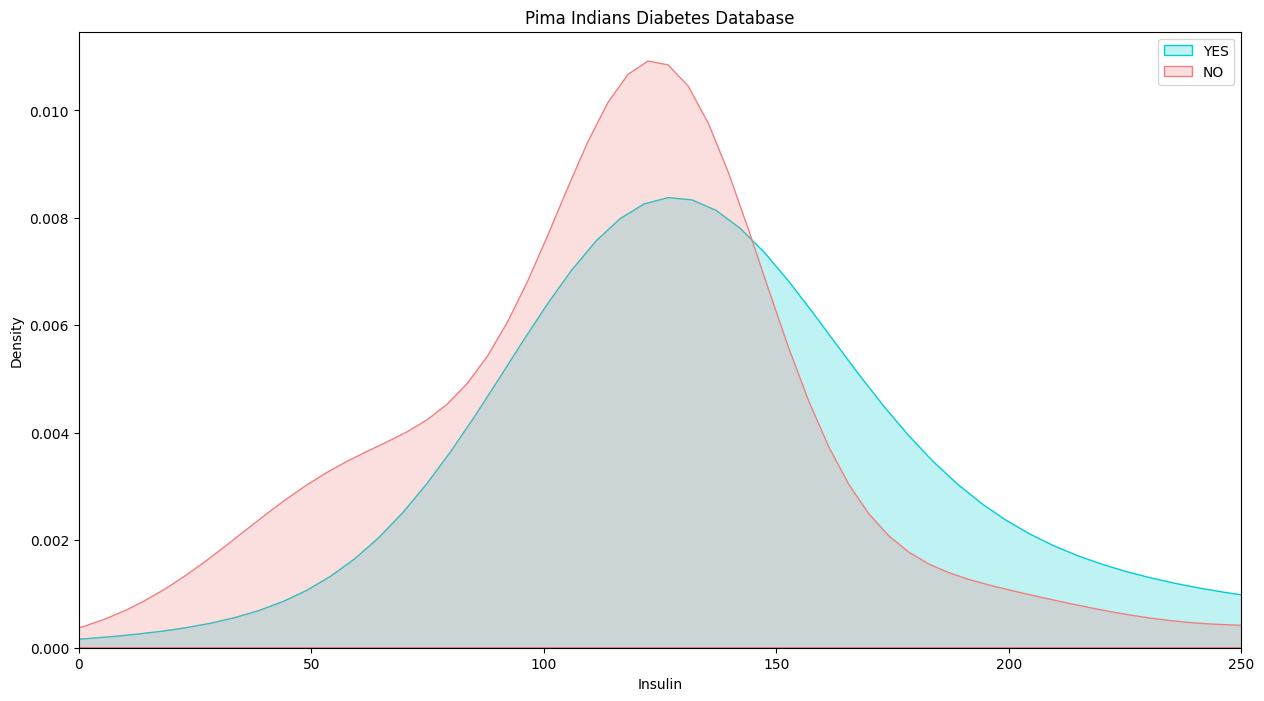

In [169]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_data["Insulin"][df_data.Outcome == 1], 
                 color="darkturquoise", shade=True)
sns.kdeplot(df_data["Insulin"][df_data.Outcome == 0], 
            color="lightcoral", shade=True)
plt.legend(['YES', 'NO'])
plt.title('Pima Indians Diabetes Database')
ax.set(xlabel='Insulin')
plt.xlim(0,250)
plt.show()

C:\Users\405\AppData\Local\Temp\ipykernel_8620\4152008538.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_data["BMI"][df_data.Outcome == 1],
C:\Users\405\AppData\Local\Temp\ipykernel_8620\4152008538.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_data["BMI"][df_data.Outcome == 0],


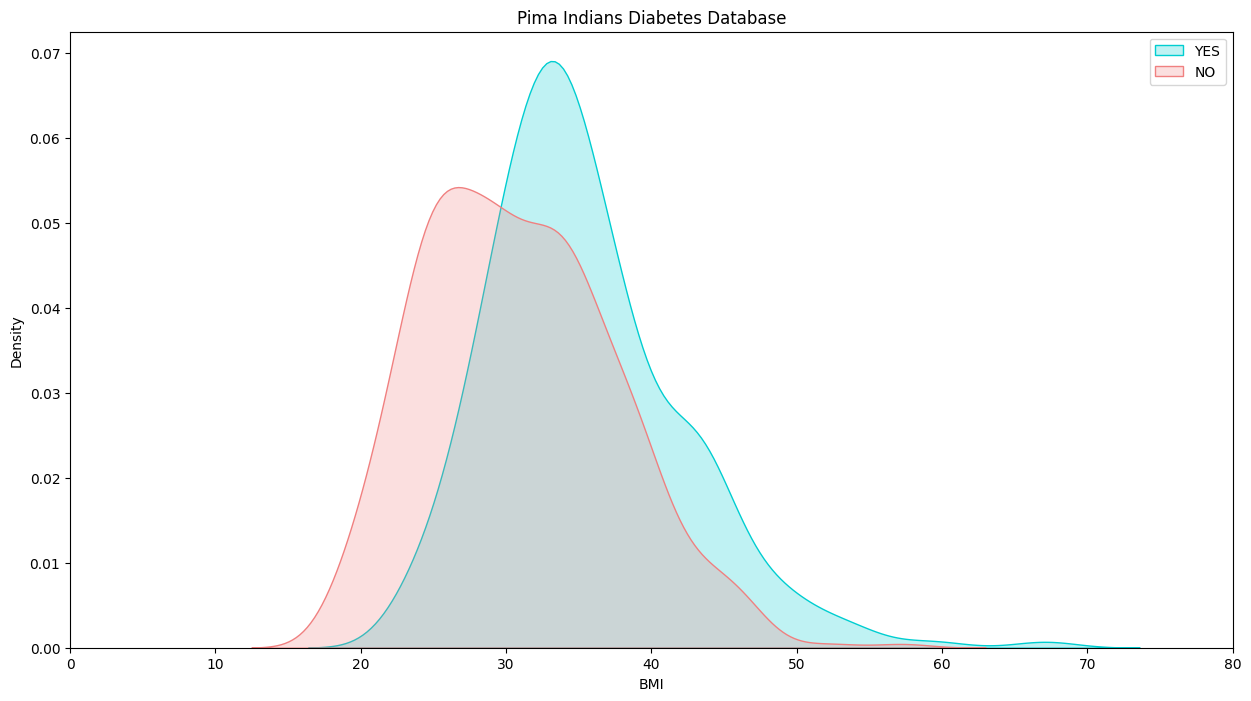

In [170]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_data["BMI"][df_data.Outcome == 1], 
                 color="darkturquoise", shade=True)
sns.kdeplot(df_data["BMI"][df_data.Outcome == 0], 
            color="lightcoral", shade=True)
plt.legend(['YES', 'NO'])
plt.title('Pima Indians Diabetes Database')
ax.set(xlabel='BMI')
plt.xlim(0,80)
plt.show()

C:\Users\405\AppData\Local\Temp\ipykernel_8620\3197868778.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_data["DiabetesPedigreeFunction"][df_data.Outcome == 1],
C:\Users\405\AppData\Local\Temp\ipykernel_8620\3197868778.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_data["DiabetesPedigreeFunction"][df_data.Outcome == 0],


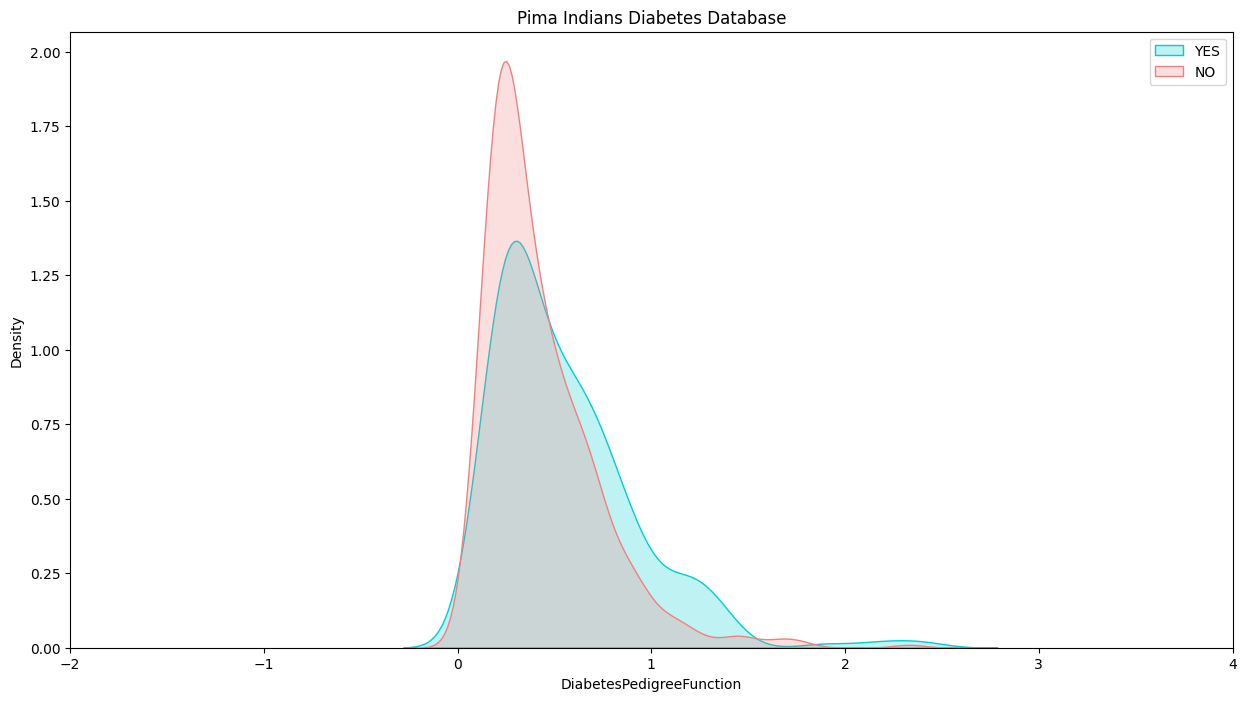

In [171]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_data["DiabetesPedigreeFunction"][df_data.Outcome == 1], 
                 color="darkturquoise", shade=True)
sns.kdeplot(df_data["DiabetesPedigreeFunction"][df_data.Outcome == 0], 
            color="lightcoral", shade=True)
plt.legend(['YES', 'NO'])
plt.title('Pima Indians Diabetes Database')
ax.set(xlabel='DiabetesPedigreeFunction')
plt.xlim(-2,4)
plt.show()

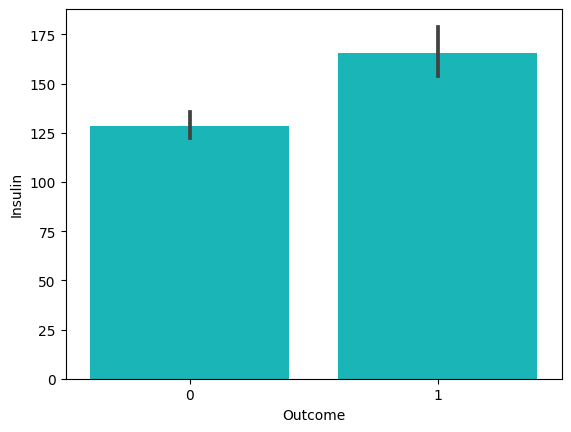

In [178]:
sns.barplot(data=df_data,x='Outcome',y='Insulin',color='darkturquoise')
plt.show()

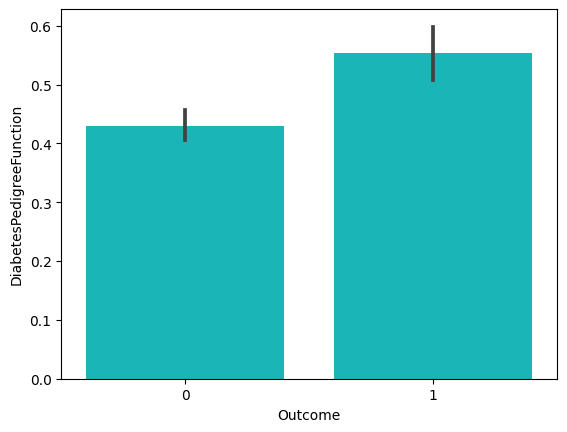

In [179]:
sns.barplot(data=df_data,x='Outcome',y='DiabetesPedigreeFunction',color='darkturquoise')
plt.show()

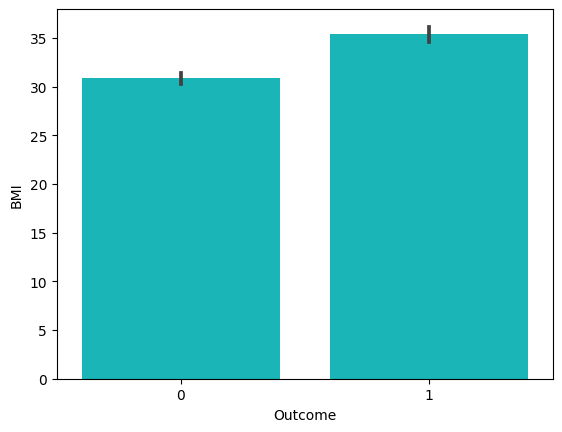

In [180]:
sns.barplot(data=df_data,x='Outcome',y='BMI',color='darkturquoise')
plt.show()

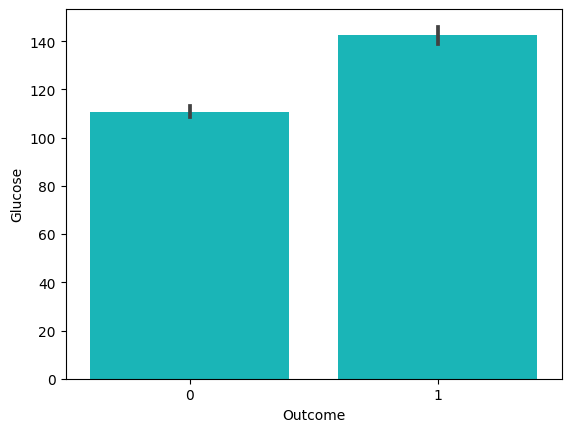

In [182]:
sns.barplot(data=df_data,x='Outcome',y='Glucose',color='darkturquoise')
plt.show()